In [1]:
# organizing imports 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import os, json

## Creating Folder

In [3]:
################## Change name folder #########################
basedir = 'D:\\Thesis\\AR\\variation_mask\\'
for i, fn in enumerate(os.listdir(basedir)):
    firstname,_,surname = fn.rpartition(' ')
    if i+1 < 10:
        os.rename(os.path.join(basedir, fn), os.path.join(basedir + 'M-00' + str(i+1)))
    elif i+1 <= 50:
        os.rename(os.path.join(basedir, fn), os.path.join(basedir + 'M-0' + str(i+1)))
    elif i+1 < 60:
        os.rename(os.path.join(basedir, fn), os.path.join(basedir + 'W-00' + str(i+1-50))) 
    else: 
        os.rename(os.path.join(basedir, fn), os.path.join(basedir + 'W-0' + str(i+1-50)))
######################## Create folder ###########################

## Generating variation_mask

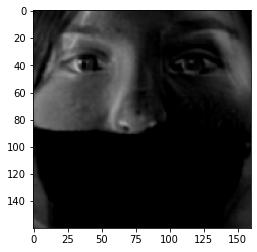

In [51]:
# Python programe to generate mask variation 
for i in range(1, 51):
    if i < 10:
        neutral_image = cv2.imread('D:\\Thesis\\AR\\train\\W-00'+str(i)+'-01\\W-00'+str(i)+'-01.bmp')
        variation_dir = 'D:\\Thesis\\AR\\variation\\W-00'+str(i)
    else:
        neutral_image = cv2.imread('D:\\Thesis\\AR\\train\\W-0'+str(i)+'-01\\W-0'+str(i)+'-01.bmp')
        variation_dir = 'D:\\Thesis\\AR\\variation\\W-0'+str(i)
    for fn in (os.listdir(variation_dir)):
        image_path = os.path.join(variation_dir, fn)
        variation_image = cv2.imread(image_path)

        variation_mask = cv2.subtract(variation_image, neutral_image)
        #Save image
        string = variation_dir
        string=string.replace('variation', 'variation_mask')
        if not os.path.exists(string):
              os.makedirs(string)
        cv2.imwrite(string+'/'+str(os.path.basename(fn )), variation_mask)

C:\Users\lengo\miniconda3\envs\python\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


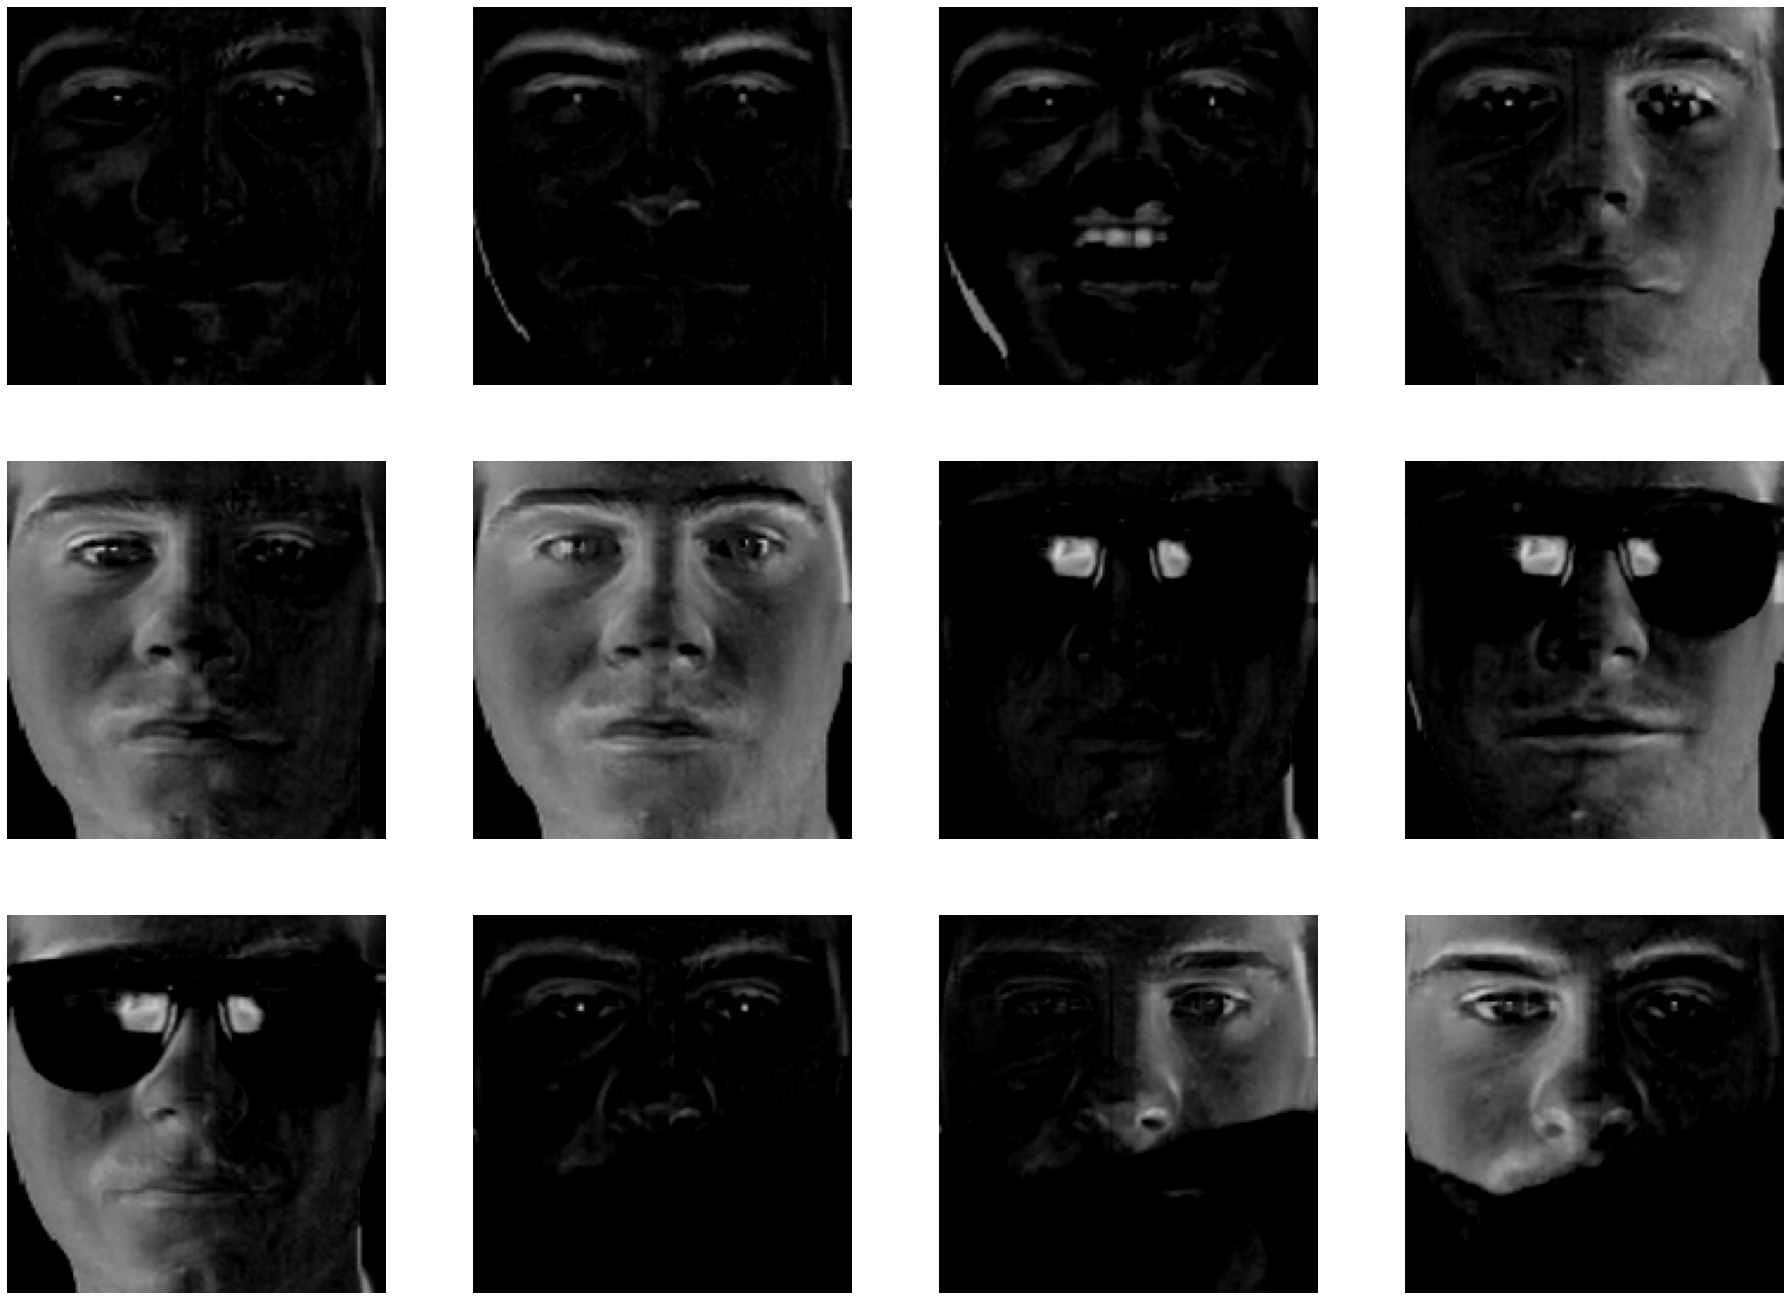

In [80]:
import matplotlib.pyplot as mpplot
# Show multi-images in one figure
# Creating figure
images = []
mask_dir = 'D:\\Thesis\\AR\\variation_mask\\M-001'
for i, img in enumerate(os.listdir(mask_dir)):
    img_path = os.path.join(mask_dir, img)
    variation_img = cv2.imread(img_path)
    images.append(variation_img)

plt.figure(figsize=(32,32))
columns = 4
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.xticks([])
    plt.yticks([])

## Generating average_variation_mask

In [1]:
pwd

'D:\\Thesis\\AR'

In [8]:
# Read an image from folder in folder with OpenCV and convert it to the RGB colorspace
for j in range(2, 10):
    format = [str(j)+".bmp"]
    path = 'D:\\Thesis\\AR\\variation_mask\\'
    images = []
    for root, directories, files in os.walk(path, topdown=False):
        for i, name in enumerate(files):
            if name.endswith(tuple(format)):
                #print(str(root)+"/"+str(name))
                image = cv2.imread(str(root)+"/"+str(name))
                images.append(image)
                
    avg_var = images[0]
    for i in range(1, len(images)):
        alpha = 1.0/(i+1)
        beta = 1 - alpha
        avg_var = cv2.addWeighted(images[i], alpha, avg_var, beta, 0.0)
 
    #plt.imshow(avg_var)
    
    # Save image_mask_avr
    string = str(root)
    string = string.replace('variation_mask', 'variation_mask_avr')
    save_path = string+'avg_var_0'+str(j)+'.bmp'
    print('Image be stored in: ', save_path)
    cv2.imwrite(save_path, avg_var)

Image be stored in:  D:\Thesis\AR\variation_mask_avr\avg_var_010.bmp
Image be stored in:  D:\Thesis\AR\variation_mask_avr\avg_var_011.bmp
Image be stored in:  D:\Thesis\AR\variation_mask_avr\avg_var_012.bmp
Image be stored in:  D:\Thesis\AR\variation_mask_avr\avg_var_013.bmp


## Generating image_variation

In [109]:
# path to input images are specified and  
# images are loaded with imread command
#lst = []
for i in range(1, 51):
    if i < 10:
        neutral_path = 'D:\\Thesis\\AR\\train\\W-00'+str(i)+'-01\\W-00'+str(i)+'-01.bmp'
        neutral_image = cv2.imread(neutral_path)
    else:
        neutral_path = 'D:\\Thesis\\AR\\train\\W-0'+str(i)+'-01\\W-0'+str(i)+'-01.bmp'
        neutral_image = cv2.imread(neutral_path)

    avr_variation_dir = 'D:\\Thesis\\AR\\variation_mask_avr\\'
    #avr_variation_dir = 'D:\\Thesis\\AR\\variation_mask\\M-005'
    
    for j, fn in enumerate(os.listdir(avr_variation_dir)):
        image_path = os.path.join(avr_variation_dir, fn)
        avr_variation_image = cv2.imread(image_path)

        variation_image = cv2.addWeighted(neutral_image, 0.4, avr_variation_image, 0.6, 0.0)
        #lst.append(variation_image)
        #Save image
        if j < 8:
            string = neutral_path.replace('01.bmp', '0'+str(j+2)+'.bmp')
        else: 
            string = neutral_path.replace('01.bmp', str(j+2)+'.bmp')
        cv2.imwrite(string, variation_image)
        